# Phys 581 Winter 2019
# Assignment #3: Data fitting
## Alexander Hickey, 10169582

In [1]:
#Import useful libraries
import numpy as np
import scipy.stats
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction

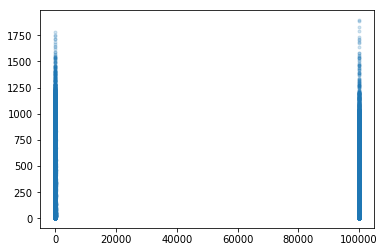

dtype([('year', '<i4'), ('day', '<i4'), ('hour', '<i4'), ('minute', '<i4'), ('imf_id', '<i4'), ('plasma_id', '<i4'), ('imf_n_average', '<i4'), ('plasma_n_average', '<i4'), ('percent_interpolated', '<i4'), ('timeshift', '<i4'), ('timeshift_rms', '<i4'), ('pfn_rms', '<f4'), ('observation_time_delta', '<i4'), ('b_magnitude', '<f4'), ('bx', '<f4'), ('by', '<f4'), ('bz', '<f4'), ('by_gsm', '<f4'), ('bz_gsm', '<f4'), ('b_magnitude_rms', '<f4'), ('b_vector_rms', '<f4'), ('v', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('proton_density', '<f4'), ('temperature', '<f4'), ('dynamic_pressure', '<f4'), ('electric_field', '<f4'), ('plasma_beta', '<f4'), ('alfven_mach_number', '<f4'), ('pos_x', '<f4'), ('pos_y', '<f4'), ('pos_z', '<f4'), ('bow_x', '<f4'), ('bow_y', '<f4'), ('bow_z', '<f4'), ('ae_index', '<i4'), ('al_index', '<i4'), ('au_index', '<i4'), ('symd_index', '<i4'), ('symh_index', '<i4'), ('asymd_index', '<i4'), ('asymh_index', '<i4'), ('pc_index', '<f4'), ('magnetosonic_mach_numbe

In [87]:
#Data doesn't make sense
data = np.load('omni_1min_2014.npy')
plt.plot( data['vz'], data['ae_index'], '.', alpha=0.2 )
plt.show()
data.dtype

In [105]:
# Standardize variables to reduce numerical instability
dtype = np.dtype([ ('min', np.double), ('max', np.double), ('mean', np.double), ('stdev', np.double)])

process = {}
process['bz'] = np.array([(-29, +29, np.nan, np.nan)], dtype=dtype)
process['bx'],process['by'] = process['bz'].copy(), process['bz'].copy()
process['vx'] = np.array([(-2100, +50.0, np.nan, np.nan)], dtype=dtype) 
process['vy'],process['vz'] = process['vx'].copy(), process['vx'].copy()
process['ae_index'] = np.array([(-100, +2999, np.nan, np.nan)], dtype=dtype) 

In [112]:
process['bz'][]

ValueError: no field of name <f8

In [ ]:
allgood = np.ones( len(data), dtype=np.bool )

for name in process:
    p = process[name]
    wgood = (data[name] >= p['min']) & (data[name] <= p['max'])
    allgood = allgood & wgood   
    
newdat = {}
for name in process:
    p = process[name]
    dat = data[name][allgood].astype(np.double)

    if np.isnan( p['mean'] ):
        p['mean'] = np.mean( dat )
        p['stdev'] = np.std( dat )
        dat = ( dat - p['mean'] ) / p['stdev']
    
    newdat[name] = dat

In [ ]:
# we want to fit 'ae_index' using one or more of the other quantities
#
if 'ae_index' in newdat:
    yfit = newdat.pop('ae_index')
    xfit = newdat.copy()

print( 'xfit: ', xfit, '\n yfit:', yfit)

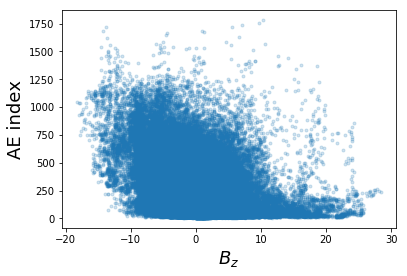

In [8]:
#Certain values are 9999, corresponds to missing value
goodvalues = data['bz'] <= 9000
dat = data[goodvalues]

plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

##### Task:

Use tools in scipy.optimize (or elsewhere) to fit a linear model with a single variable 

 $$ AE = c_1 B_z $$

by finding the value of $c_1$ which minimizes the goodness of fit given by 

 $$ \chi^2 = \sum (\mathrm{model} - \mathrm{data})^2 $$

then try two variables

 $$ AE = c_1 B_z + c_2 v_x $$
 
then try a non-linear transformation of a single variable
 
 $$ AE = c_1 B_z + c_2 v_x^2 $$ 
 
then try cross terms 

 $$ AE = c_1 B_z + c_2 v_x + c_3 B_z v_x $$ 
 
then explore combinations and transformations of variables to obtain "the best" model.  Think about what that means.

In [70]:
def linfit(c,dat):
    
    
    return c[0]*dat['bz']+c[1]

def chi2(c,dat):
    

    temp = np.sum( ( dat['ae_index']-linfit(c,dat) )**2 )/len(dat)**2
    

    return temp


opt = scipy.optimize.minimize(chi2,[9.3,-10],args = (dat),method='Nelder-Mead')
print(dat['bz'].shape)

(457562,)


In [63]:
chi2([100,100],dat)

0.4366243979573446

ValueError: operands could not be broadcast together with shapes (50,) (457562,) 

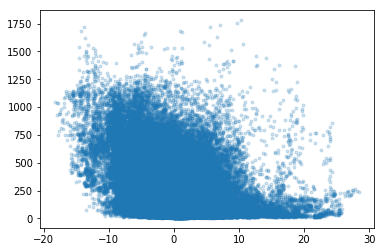

In [9]:
plt.plot( dat['bz'], dat['ae_index'], '.', alpha=0.2 )
plt.plot( dat['bz'], linfit([c1,c2],dat))

plt.xlabel('$B_z$',fontsize=18)
plt.ylabel('AE index',fontsize=18)
plt.show()

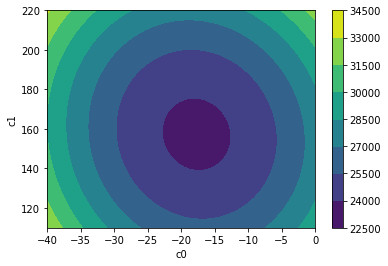

In [32]:
c1 = np.linspace(-40,0,50)
c2 = np.linspace(110,220,50)

chiarr = np.zeros((len(c1),len(c2)))


for j in range(len(c1)):
    for k in range(len(c2)):
        
        chiarr[j][k] = chi2([c1[j],c2[k]],dat)
        
plt.contourf(c1,c2,chiarr.T)
plt.colorbar()
plt.xlabel('c0')
plt.ylabel('c1')

plt.show()